In [55]:
def time_sec(s):
  if s.startswith('0 days 00:'):
    s = s[10:]
  (splitted_time,sec) = s.split(":")

  total = float(splitted_time) * 60 + float(sec)
  answer = round(total,3)
  return answer


def indexer(s):
  if s == 'SOFT':
    return 0
  if s == 'MEDIUM':
    return 1
  if s == 'HARD':
    return 2
  if s == 'INTERMEDIATE':
    return 3



def cleaning(df):
  # DROPS.
  df.drop('Unnamed: 0',axis=1,inplace=True)
  features = ['LapTime','LapNumber','Stint','Sector1Time','Sector2Time','Sector3Time','Compound','TyreLife','Driver','Team']
  df.dropna(subset = features ,inplace=True)

  # DATA TYPES.
  df = df.astype({"LapTime": str}, errors='raise') 
  df = df.astype({"Sector1Time": str}, errors='raise') 
  df = df.astype({"Sector2Time": str}, errors='raise') 
  df = df.astype({"Sector3Time": str}, errors='raise') 

  # TIMES IN TERMS OF SECONDS.
  df['LapTime'] = df['LapTime'].map(time_sec)
  df['Sector1Time'] = df['Sector1Time'].map(time_sec)
  df['Sector2Time'] = df['Sector2Time'].map(time_sec)
  df['Sector3Time'] = df['Sector3Time'].map(time_sec)

  df = df.astype({"Compound": str}, errors='raise')
  df['Compound'] = df['Compound'].map(indexer)

  df.drop(['Time','DriverNumber','SpeedST','FreshTyre','LapStartTime','TrackStatus','IsAccurate','LapStartDate'],axis=1,inplace=True)
  df.drop(['Sector1SessionTime','Sector2SessionTime','Sector3SessionTime','SpeedI1','SpeedI2','SpeedFL'],axis=1,inplace=True)

  df['PitOutTime'] = df['PitOutTime'].fillna(0)
  df['PitInTime'] = df['PitInTime'].fillna(0)

  df.loc[df.PitOutTime != 0, 'PitOutTime'] = 1
  df.loc[df.PitInTime != 0, 'PitInTime'] = 1


  return df

In [56]:
import pandas as pd

In [57]:
from google.colab import files
uploaded = files.upload()

Saving Imola_GP.csv to Imola_GP (1).csv


In [58]:
df = pd.read_csv('Imola_GP.csv')
df_copy = df.copy()

In [59]:
df.head()

,Unnamed: 0,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0,0 days 01:03:54.806000,1,NaN,1.0,1.0,0 days 00:25:08.250000,NaN,NaN,0 days 00:00:31.809000,...,100.0,INTERMEDIATE,1.0,True,0 days 01:02:03.225000,Red Bull,VER,24,False,2022-04-24 13:03:03.238
1,1,0 days 01:06:20.801000,1,0 days 00:02:25.995000,2.0,1.0,NaN,NaN,0 days 00:00:54.085000,0 days 00:00:47.410000,...,133.0,INTERMEDIATE,2.0,True,0 days 01:03:54.806000,Red Bull,VER,4,False,2022-04-24 13:04:54.819
2,2,0 days 01:08:37.301000,1,0 days 00:02:16.500000,3.0,1.0,NaN,NaN,0 days 00:00:45.833000,0 days 00:00:46.168000,...,164.0,INTERMEDIATE,3.0,True,0 days 01:06:20.801000,Red Bull,VER,4,False,2022-04-24 13:07:20.814
3,3,0 days 01:11:04.728000,1,0 days 00:02:27.427000,4.0,1.0,NaN,NaN,0 days 00:00:42.546000,0 days 00:00:48.335000,...,101.0,INTERMEDIATE,4.0,True,0 days 01:08:37.301000,Red Bull,VER,4,False,2022-04-24 13:09:37.314
4,4,0 days 01:12:36.178000,1,0 days 00:01:31.450000,5.0,1.0,NaN,NaN,0 days 00:00:29.619000,0 days 00:00:30.801000,...,273.0,INTERMEDIATE,5.0,True,0 days 01:11:04.728000,Red Bull,VER,1,False,2022-04-24 13:12:04.741


In [60]:
print(df['Compound'].value_counts())

MEDIUM          722
INTERMEDIATE    329
SOFT             49
HARD             32
Name: Compound, dtype: int64


In [61]:
df = cleaning(df)

In [62]:
df.head()

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Team,Driver
1,145.995,2.0,1.0,0,0,54.085,47.410,44.500,3,2.0,Red Bull,VER
2,136.500,3.0,1.0,0,0,45.833,46.168,44.499,3,3.0,Red Bull,VER
3,147.427,4.0,1.0,0,0,42.546,48.335,56.546,3,4.0,Red Bull,VER
4,91.450,5.0,1.0,0,0,29.619,30.801,31.030,3,5.0,Red Bull,VER
5,90.444,6.0,1.0,0,0,28.916,30.794,30.734,3,6.0,Red Bull,VER


In [63]:
import seaborn as sns

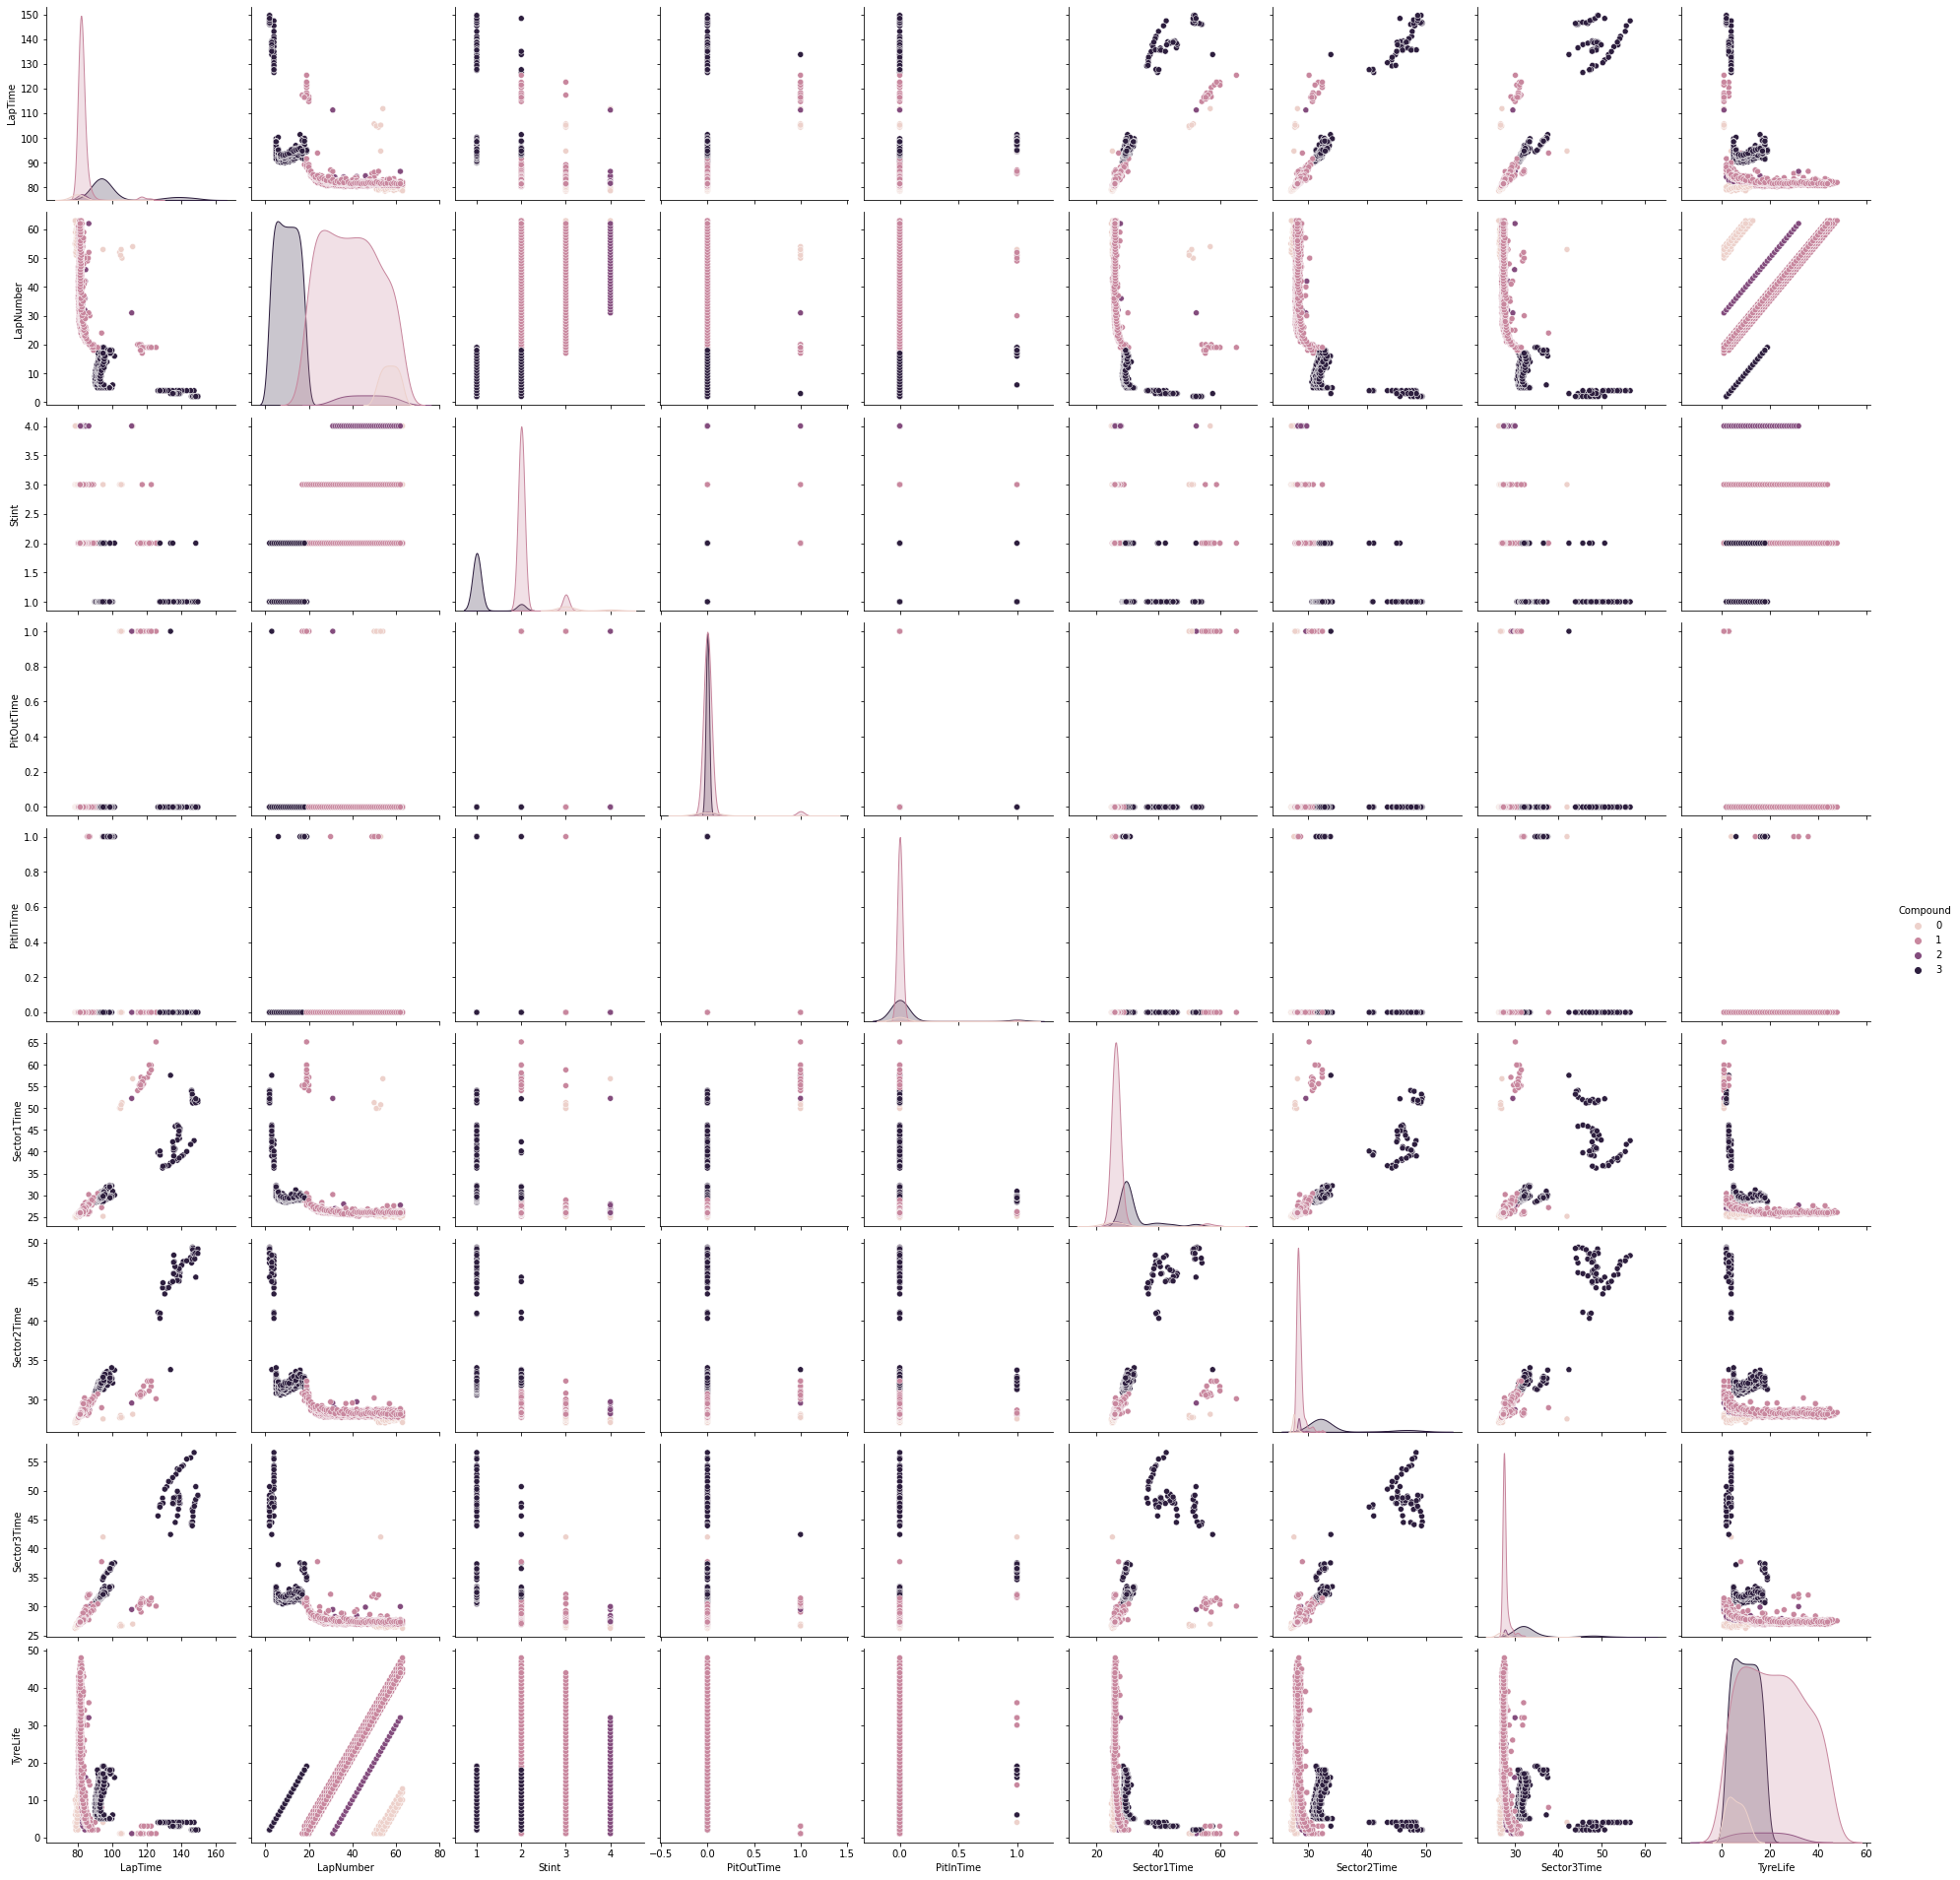

In [ ]:
sns.pairplot(df, hue = 'Compound',height=3)

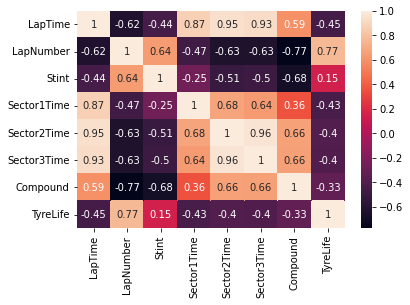

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [64]:
df.drop(['Team','Driver','Sector3Time'],axis=1,inplace=True)

In [65]:
X = df.drop(['LapTime'],axis=1)

In [66]:
y = df['LapTime'] 

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

LinearRegression()

In [72]:
lm.coef_

array([-1.90735972e-02,  1.41286511e-01,  1.22224102e+01,  4.05575752e+00,
        5.34502302e-01,  2.61673723e+00, -2.30143194e-01, -3.21120102e-03])

In [73]:
predictions = lm.predict(X_test)

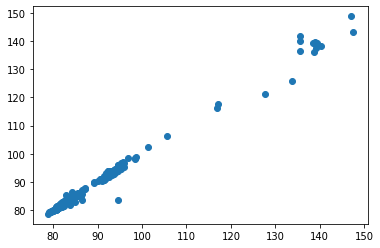

In [74]:
import matplotlib.pyplot as plt

plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


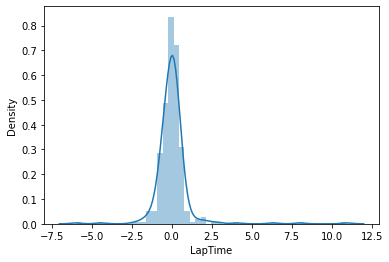

In [75]:
sns.distplot((y_test-predictions))

In [76]:
data = pd.DataFrame(predictions, y_test.values,columns=['predictions'])

In [77]:
data.head()

,predictions
138.920,139.733043
81.396,81.358612
95.847,95.150402
138.537,139.308946
80.962,80.475427


In [78]:
df_copy = cleaning(df_copy)

In [79]:
df_copy.head()

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Team,Driver
1,145.995,2.0,1.0,0,0,54.085,47.410,44.500,3,2.0,Red Bull,VER
2,136.500,3.0,1.0,0,0,45.833,46.168,44.499,3,3.0,Red Bull,VER
3,147.427,4.0,1.0,0,0,42.546,48.335,56.546,3,4.0,Red Bull,VER
4,91.450,5.0,1.0,0,0,29.619,30.801,31.030,3,5.0,Red Bull,VER
5,90.444,6.0,1.0,0,0,28.916,30.794,30.734,3,6.0,Red Bull,VER


In [80]:
df_lec = df.loc[df_copy['Driver'] == 'LEC']

In [81]:
df_lec['LapTime']
df_lec['LapTime'].shape

(62,)

In [82]:
import numpy as np

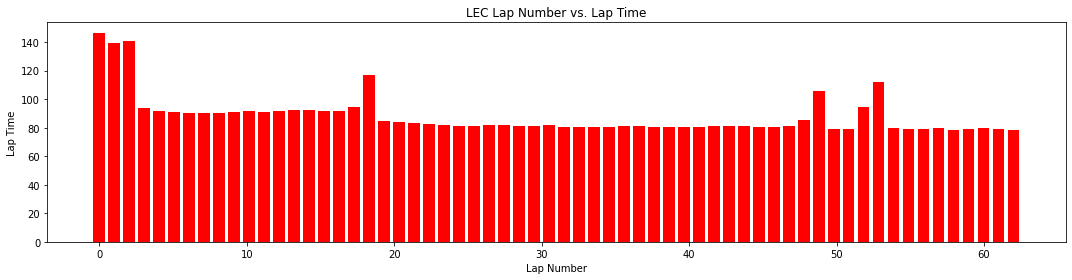

In [83]:

fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,4))

axes.bar(np.linspace(0,62,62),df_lec['LapTime'].values[0:],color = 'Red')
axes.set_title('LEC Lap Number vs. Lap Time')
axes.set_xlabel('Lap Number')
axes.set_ylabel('Lap Time')

plt.tight_layout()

plt.savefig('LEC_Imola(Actual).png', dpi = 1200)


In [84]:
df_copy.head()

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Team,Driver
1,145.995,2.0,1.0,0,0,54.085,47.410,44.500,3,2.0,Red Bull,VER
2,136.500,3.0,1.0,0,0,45.833,46.168,44.499,3,3.0,Red Bull,VER
3,147.427,4.0,1.0,0,0,42.546,48.335,56.546,3,4.0,Red Bull,VER
4,91.450,5.0,1.0,0,0,29.619,30.801,31.030,3,5.0,Red Bull,VER
5,90.444,6.0,1.0,0,0,28.916,30.794,30.734,3,6.0,Red Bull,VER


In [85]:
indexNames = df_copy[ df_copy['Driver'] == 'LEC' ].index

In [86]:
df_copy2 = df_copy.drop(indexNames)

In [87]:
df_copy2.head()

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Team,Driver
1,145.995,2.0,1.0,0,0,54.085,47.410,44.500,3,2.0,Red Bull,VER
2,136.500,3.0,1.0,0,0,45.833,46.168,44.499,3,3.0,Red Bull,VER
3,147.427,4.0,1.0,0,0,42.546,48.335,56.546,3,4.0,Red Bull,VER
4,91.450,5.0,1.0,0,0,29.619,30.801,31.030,3,5.0,Red Bull,VER
5,90.444,6.0,1.0,0,0,28.916,30.794,30.734,3,6.0,Red Bull,VER


In [88]:
df_copy2.drop(['Team','Driver','Sector3Time'],axis=1,inplace=True)

In [89]:
df_copy2.head()

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Compound,TyreLife
1,145.995,2.0,1.0,0,0,54.085,47.410,3,2.0
2,136.500,3.0,1.0,0,0,45.833,46.168,3,3.0
3,147.427,4.0,1.0,0,0,42.546,48.335,3,4.0
4,91.450,5.0,1.0,0,0,29.619,30.801,3,5.0
5,90.444,6.0,1.0,0,0,28.916,30.794,3,6.0


In [90]:
X2 = df_copy2.drop(['LapTime'],axis=1)

In [91]:
y2 = df_copy2['LapTime'] 

In [92]:
model = LinearRegression()

In [93]:
model.fit(X2,y2)

LinearRegression()

In [94]:
df_lec.head()

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Compound,TyreLife
64,146.514,2.0,1.0,0,0,52.511,49.401,3,2.0
65,139.272,3.0,1.0,0,0,45.324,46.153,3,3.0
66,141.148,4.0,1.0,0,0,39.249,47.578,3,4.0
67,93.592,5.0,1.0,0,0,30.808,31.405,3,5.0
68,91.515,6.0,1.0,0,0,29.554,30.842,3,6.0


In [95]:
df_lec = df_lec.drop(['LapTime'],axis=1)
predictions = model.predict(df_lec)

In [96]:
predictions.shape

(62,)

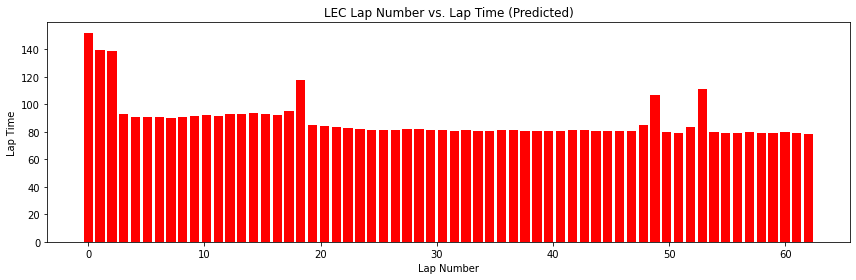

In [97]:

fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(12,4))


axes.bar(np.linspace(0,62,62),predictions,color = 'Red')
axes.set_title('LEC Lap Number vs. Lap Time (Predicted)')
axes.set_xlabel('Lap Number')
axes.set_ylabel('Lap Time')

plt.tight_layout()

plt.savefig('LEC_Imola(Predicted).png', dpi = 1200)


In [110]:
df_copy.head()

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Team,Driver
1,145.995,2.0,1.0,0,0,54.085,47.410,44.500,3,2.0,Red Bull,VER
2,136.500,3.0,1.0,0,0,45.833,46.168,44.499,3,3.0,Red Bull,VER
3,147.427,4.0,1.0,0,0,42.546,48.335,56.546,3,4.0,Red Bull,VER
4,91.450,5.0,1.0,0,0,29.619,30.801,31.030,3,5.0,Red Bull,VER
5,90.444,6.0,1.0,0,0,28.916,30.794,30.734,3,6.0,Red Bull,VER


In [111]:
df_lecc = df.loc[df_copy['Driver'] == 'LEC']

In [112]:
df_lecc

,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Compound,TyreLife
64,146.514,2.0,1.0,0,0,52.511,49.401,3,2.0
65,139.272,3.0,1.0,0,0,45.324,46.153,3,3.0
66,141.148,4.0,1.0,0,0,39.249,47.578,3,4.0
67,93.592,5.0,1.0,0,0,30.808,31.405,3,5.0
68,91.515,6.0,1.0,0,0,29.554,30.842,3,6.0
...,...,...,...,...,...,...,...,...,...
121,78.734,59.0,4.0,0,0,24.952,27.310,0,6.0
122,79.120,60.0,4.0,0,0,25.272,27.364,0,7.0
123,79.615,61.0,4.0,0,0,25.384,27.526,0,8.0
124,79.113,62.0,4.0,0,0,24.853,27.494,0,9.0


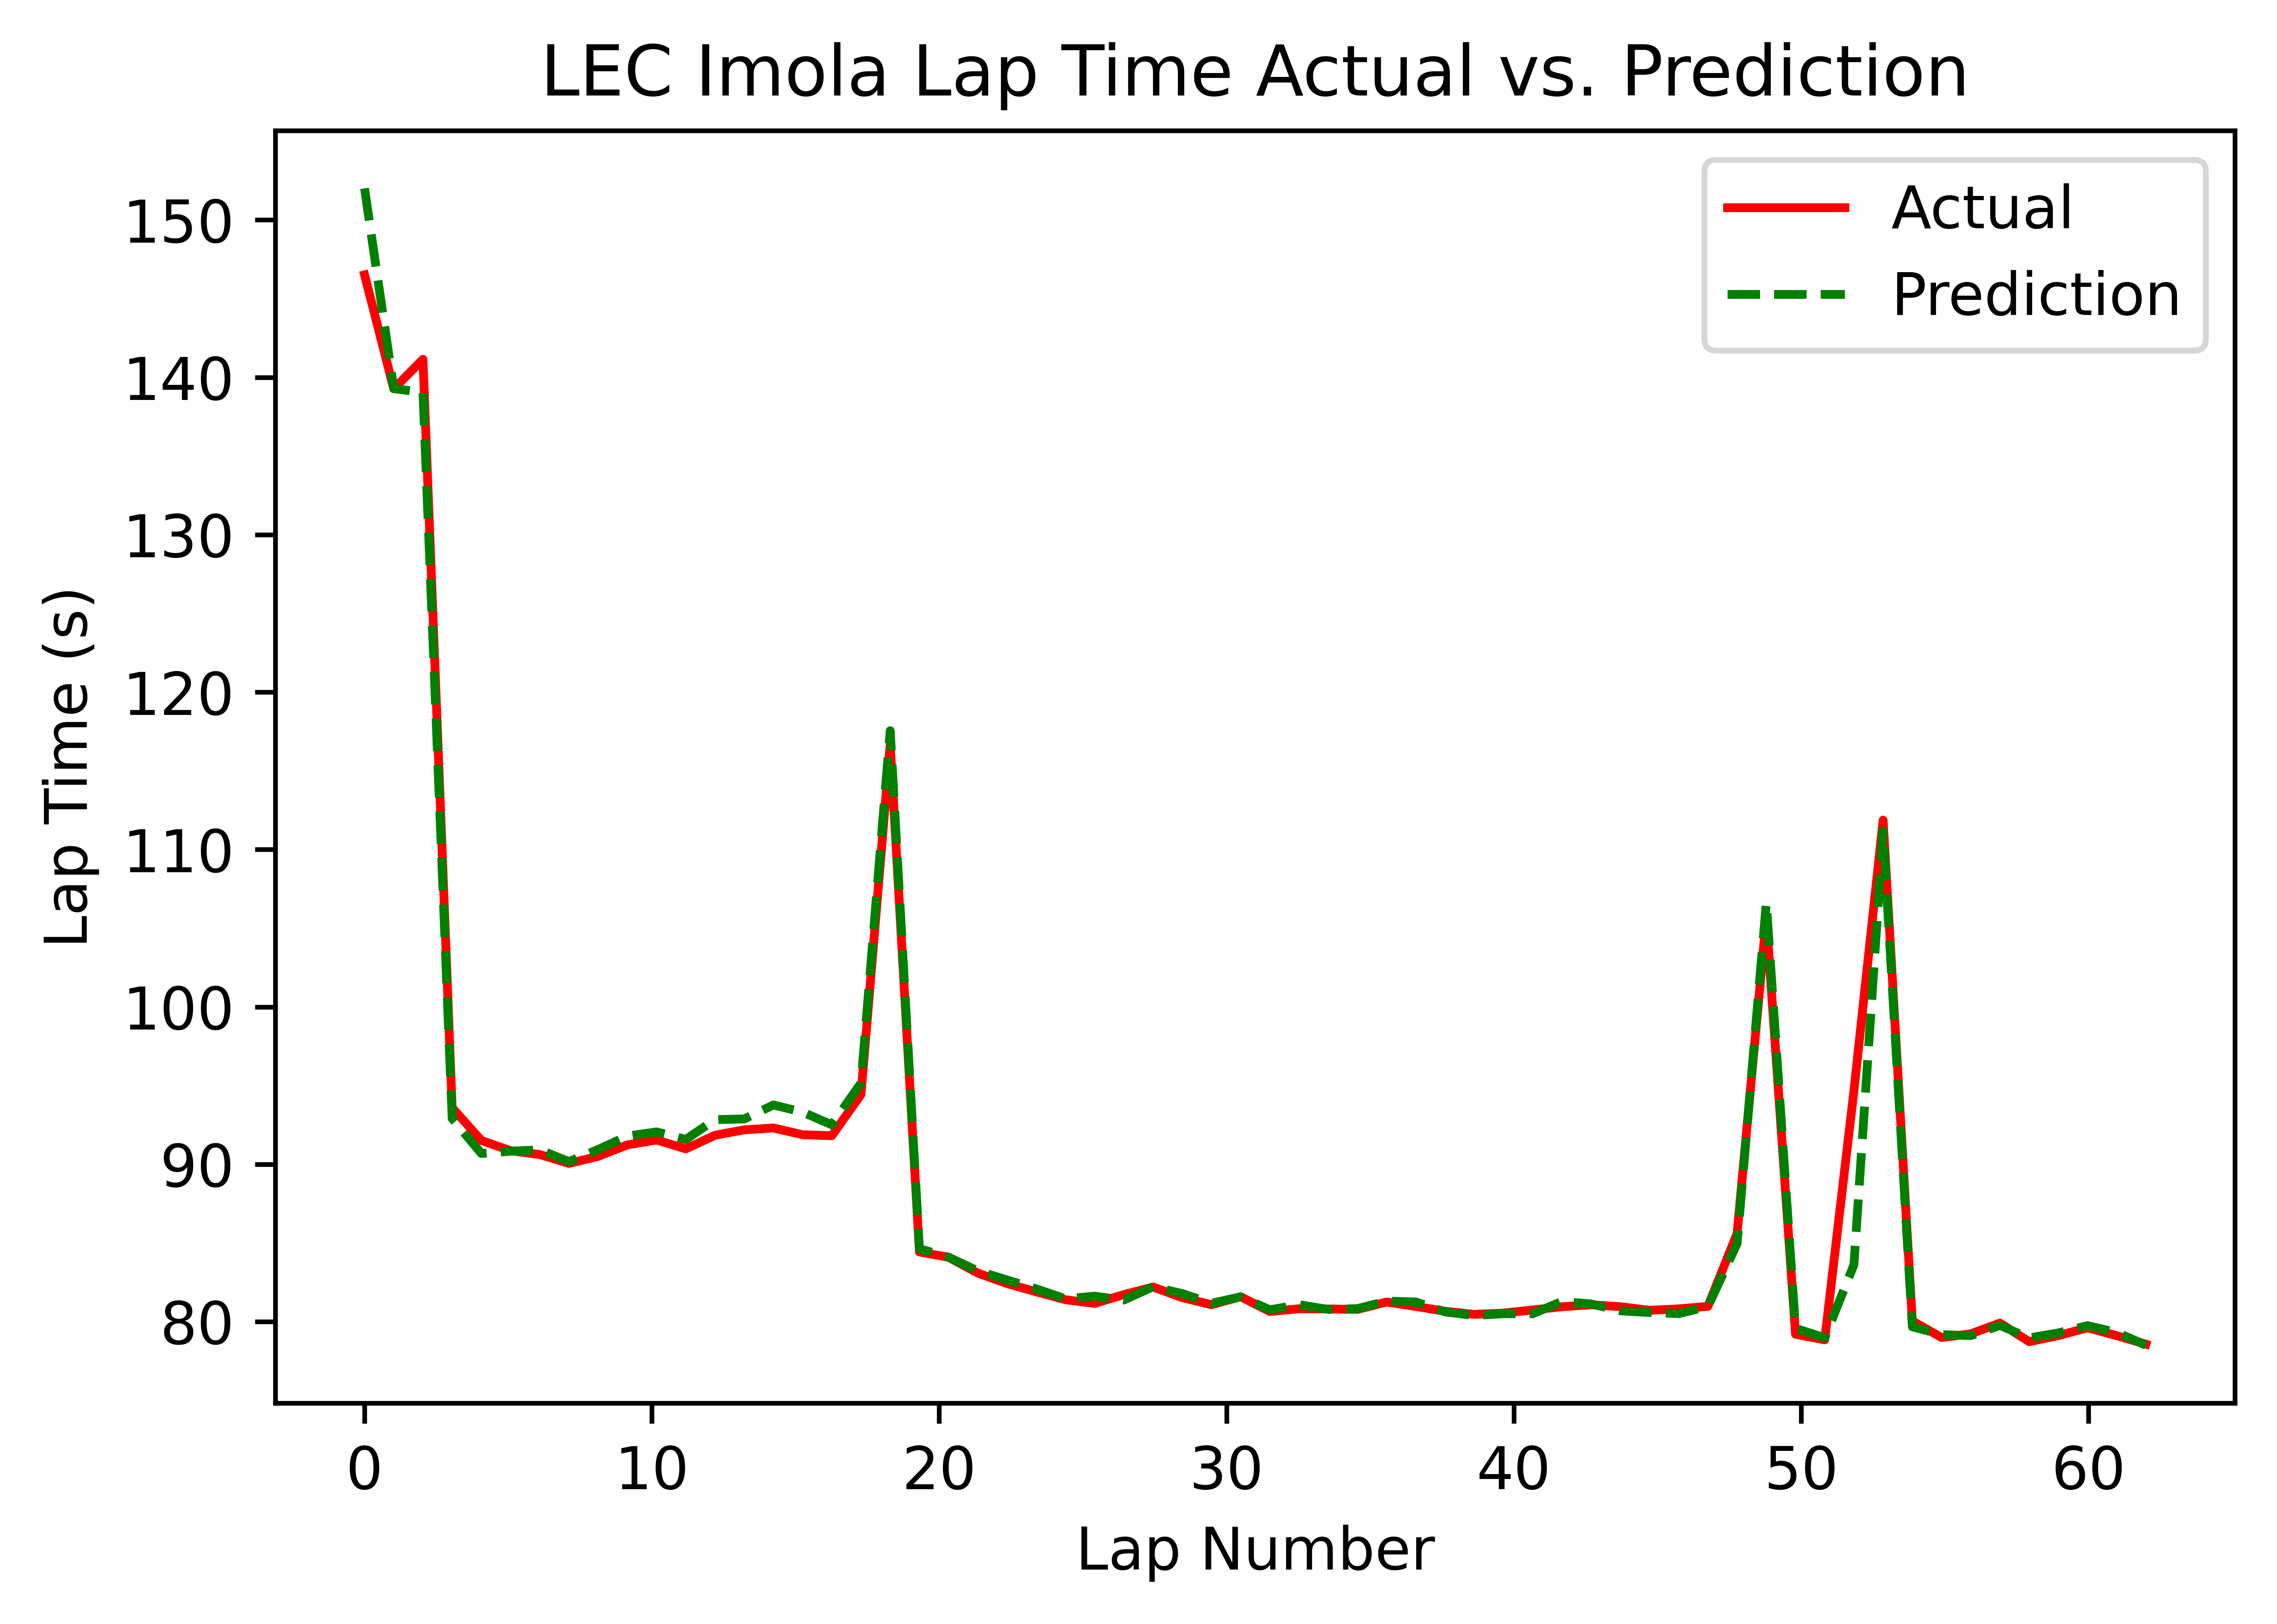

<Figure size 14400x4800 with 0 Axes>

In [127]:
plt.plot(np.linspace(0,62,62), df_lecc['LapTime'].values[0:], color = 'Red', label = 'Actual')
plt.plot(np.linspace(0,62,62), predictions, color = 'Green', linestyle = 'dashed', label = 'Prediction')

plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.title('LEC Imola Lap Time Actual vs. Prediction')
plt.legend()
plt.figure(figsize=(12,4))
plt.tight_layout()
plt.rcParams["figure.dpi"] = 1200
plt.savefig('LEC_Imola_Linegraph.png', dpi = 800)